In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CNN Validation

In [2]:
validation_dfs = []

for i in range(1,8):
    validation_dfs.append(pd.\
    DataFrame(pd.read_csv("validation_losses/cnn/param_losses_cnn_" \
                          + str(i)+".csv",header=None)).drop(0, 1))
    
#     validation_dfs[i] = validation_dfs[i]

In [3]:
validation_df = pd.DataFrame(pd.concat(validation_dfs,1).T)
validation_df.columns=["lr","hidden","hidden_2",
                                     "dropout","kernel","interaction"]+[*range(1,21)]

In [4]:
validation_df.index = [*range(len(validation_df))]

In [6]:
validation_ = pd.DataFrame(validation_df).dropna(0)

In [21]:
from matplotlib import colors as mcolors

In [22]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

cutoff = np.where(np.array(sorted_names)=="turquoise")

colors = ["b","m","g","crimson","darkorange"] + sorted_names[cutoff[0][0]:]

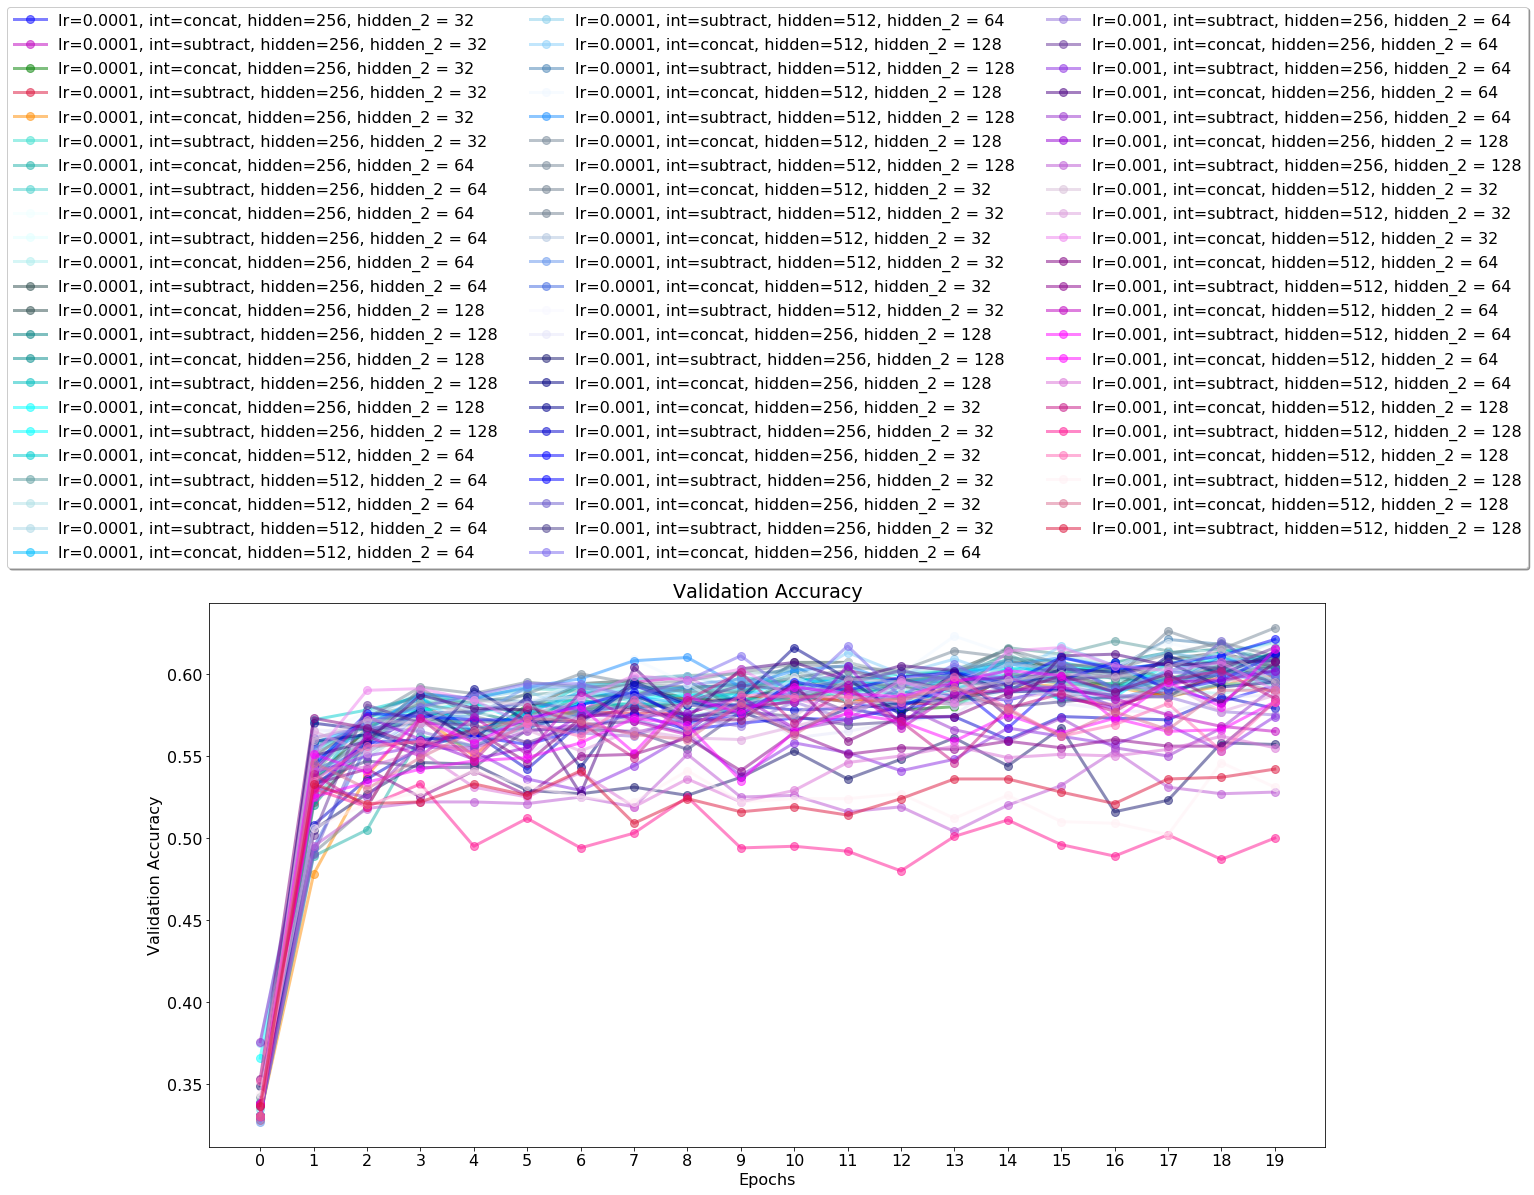

In [37]:
plt.figure(figsize=(20,10))
for i in range(len(validation_)):
    plt.plot([float(x) for x in [*validation_[[*range(1,21)]].iloc[i]]],
            linewidth=3,alpha=0.5, marker="o",markersize=8, color=colors[i],
            label="lr="+str(validation_["lr"].iloc[i])+", "+"int="+\
             str(validation_["interaction"].iloc[i]+", hidden="+str(validation_["hidden"].iloc[i])+\
                ", hidden_2 = "+str(validation_["hidden_2"].iloc[i])))
    
    plt.rcParams["font.size"] = 16
    plt.title("Validation Accuracy")
    plt.ylabel("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.xticks(range(20))

# plt.grid()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

### RNN Validation

In [69]:
validation_gru = pd.DataFrame(pd.read_csv("validation_losses/rnn/GRU_val_acc_2.csv", header=None)).drop(0,1)

In [70]:
validation_gru = validation_gru.T

In [71]:
validation_gru.head()

,0,1,2,3,4,5,6,7,8,9
1,0.001,512,64,0.1,concat,48.900002241134644,57.40000009536743,58.900004625320435,61.900001764297485,66.40000343322754
2,0.001,512,64,0.1,mul,40.300002694129944,44.200003147125244,51.100003719329834,54.40000295639038,55.80000281333923
3,0.001,512,64,0.1,subtract,44.40000355243683,51.30000114440918,57.50000476837158,59.800004959106445,64.20000195503235
4,0.001,512,128,0.1,concat,49.2000013589859,58.40000510215759,60.100001096725464,62.5,63.600003719329834
5,0.001,512,128,0.1,mul,38.30000162124634,44.10000145435333,52.000004053115845,54.90000247955322,58.60000252723694


In [74]:
validation_gru.columns=["lr","hidden","hidden_2",
                                     "dropout","interaction"]+[*range(1,6)]

In [75]:
validation_gru.head()

,lr,hidden,hidden_2,dropout,interaction,1,2,3,4,5
1,0.001,512,64,0.1,concat,48.900002241134644,57.40000009536743,58.900004625320435,61.900001764297485,66.40000343322754
2,0.001,512,64,0.1,mul,40.300002694129944,44.200003147125244,51.100003719329834,54.40000295639038,55.80000281333923
3,0.001,512,64,0.1,subtract,44.40000355243683,51.30000114440918,57.50000476837158,59.800004959106445,64.20000195503235
4,0.001,512,128,0.1,concat,49.2000013589859,58.40000510215759,60.100001096725464,62.5,63.600003719329834
5,0.001,512,128,0.1,mul,38.30000162124634,44.10000145435333,52.000004053115845,54.90000247955322,58.60000252723694


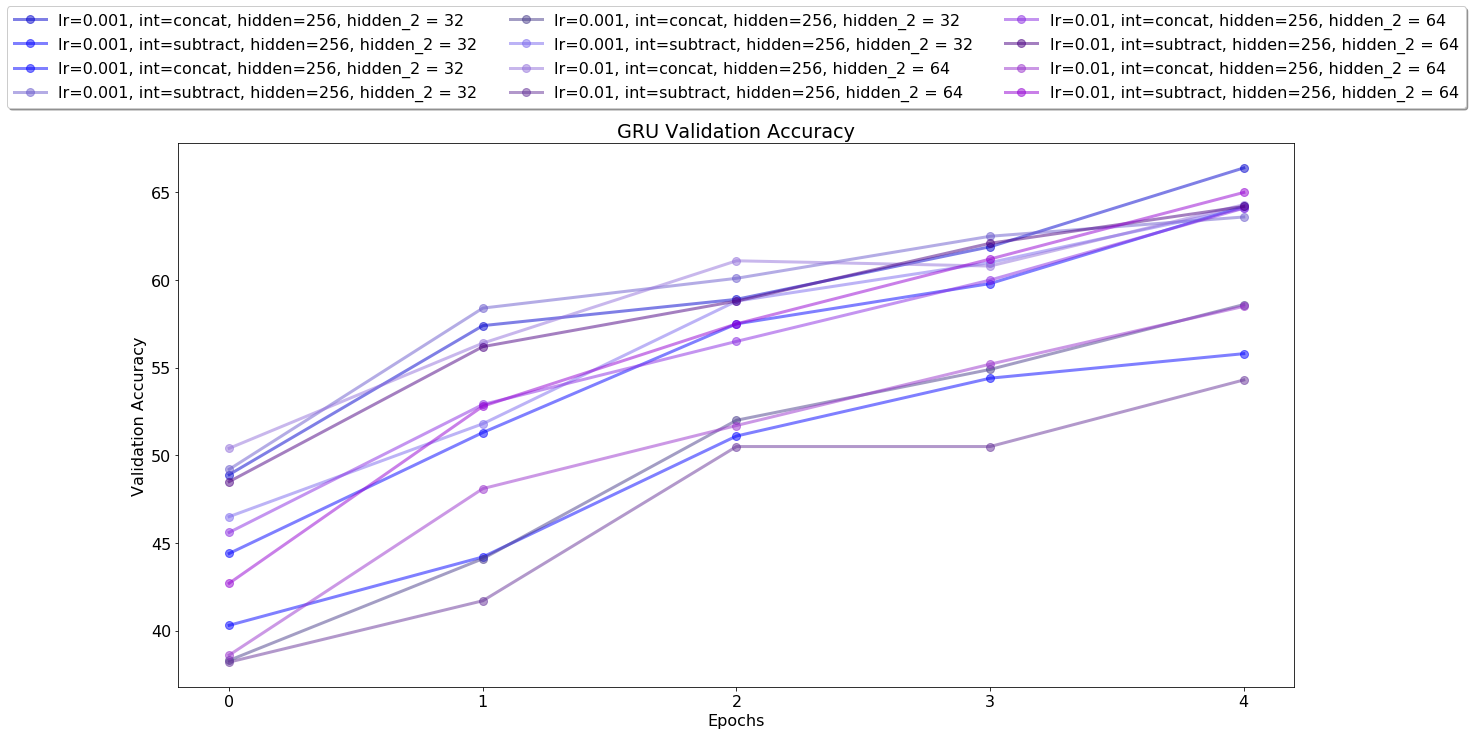

In [80]:
plt.figure(figsize=(20,10))
for i in range(len(validation_gru)):
    plt.plot([float(x) for x in [*validation_gru[[*range(1,6)]].iloc[i]]],
            linewidth=3,alpha=0.5, marker="o",markersize=8, color=colors[40:][i],
            label="lr="+str(validation_gru["lr"].iloc[i])+", "+"int="+\
             str(validation_["interaction"].iloc[i]+", hidden="+str(validation_["hidden"].iloc[i])+\
                ", hidden_2 = "+str(validation_["hidden_2"].iloc[i])))
    
    plt.rcParams["font.size"] = 16
    plt.title("GRU Validation Accuracy")
    plt.ylabel("Validation Accuracy")
    plt.xlabel("Epochs")
    plt.xticks(range(5))

# plt.grid()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)